In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [15]:
codigos_suicidio_cie10 = [
  "X60", "X61", "X62", "X63", "X64", "X65", "X66", "X67",
  "X68", "X69", "X70", "X71", "X72", "X73", "X74", "X75",
  "X76", "X77", "X78", "X79", "X80", "X81", "X82", "X83", "X84"
]

In [ ]:
file_path = '../../Datos/BayronValenzuela/DefuncionesDeis.csv'

df = pd.read_csv(file_path, encoding='latin1', sep=';').filter(items=['AÑO', 'FECHA_DEF', 'EDAD_CANT', 'DIAG2'])
df['EDAD_CANT'] = pd.to_numeric(df['EDAD_CANT'], errors='coerce').astype('Int64')

In [17]:
suicidio_rows = df[df['DIAG2'].str.startswith(tuple(codigos_suicidio_cie10), na=False)]
suicidio_rows = suicidio_rows[(suicidio_rows['EDAD_CANT'] < 18) & (suicidio_rows['EDAD_CANT'] > 5) & (suicidio_rows['AÑO'] < 2025)]
suicidio_rows['FECHA_DEF'] = pd.to_datetime(suicidio_rows['FECHA_DEF'], errors='coerce')
suicidio_rows['Mes'] = suicidio_rows['FECHA_DEF'].dt.month

grouped_by_year_month = suicidio_rows.groupby(['AÑO', 'Mes']).size().reset_index(name='Cantidad')

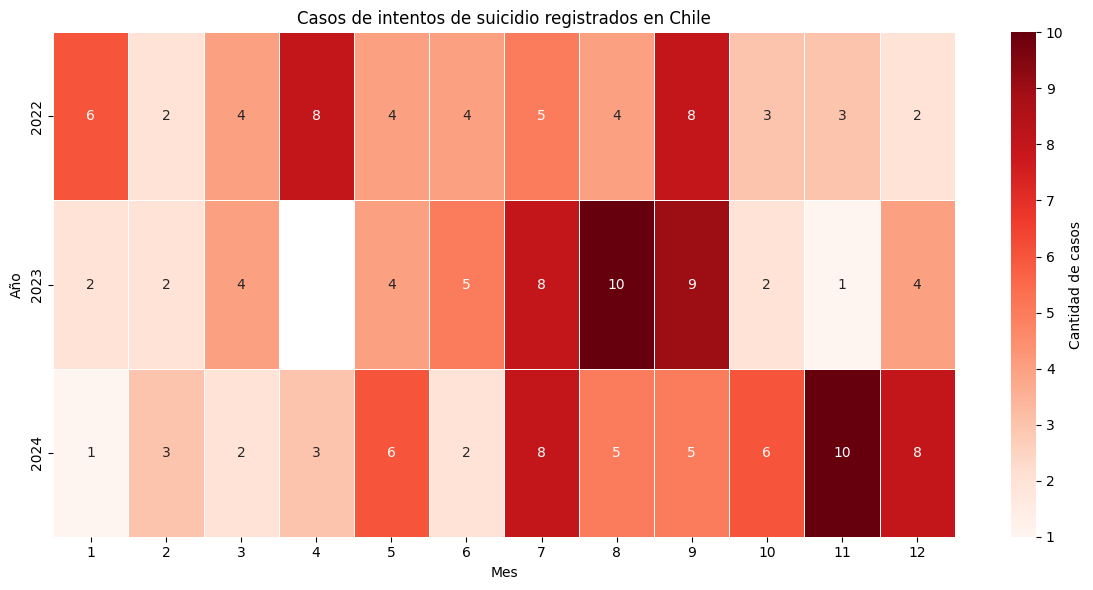

In [18]:
heatmap_data = grouped_by_year_month.pivot(index='AÑO', columns='Mes', values='Cantidad')

plt.figure(figsize=(12, 6))
sns.heatmap(
  heatmap_data, 
  annot=True,
  fmt=".0f",
  cmap="Reds",
  linewidths=0.5,
  cbar_kws={'label': 'Cantidad de casos'}
)

plt.xlabel('Mes')
plt.ylabel('Año')
plt.title('Casos de intentos de suicidio registrados en Chile')

plt.tight_layout()
plt.show()

In [ ]:
file_path2 = '../../Datos/BayronValenzuela/out_of_school.csv'

df = pd.read_csv(file_path2).rename(columns={'Out-of-school children of primary school age, both sexes (number)': 'QTY'})

In [20]:
data = df[df['Entity'].str.contains('income', na=False)]
grouped_data = data.groupby('Entity', as_index=False)['QTY'].sum()

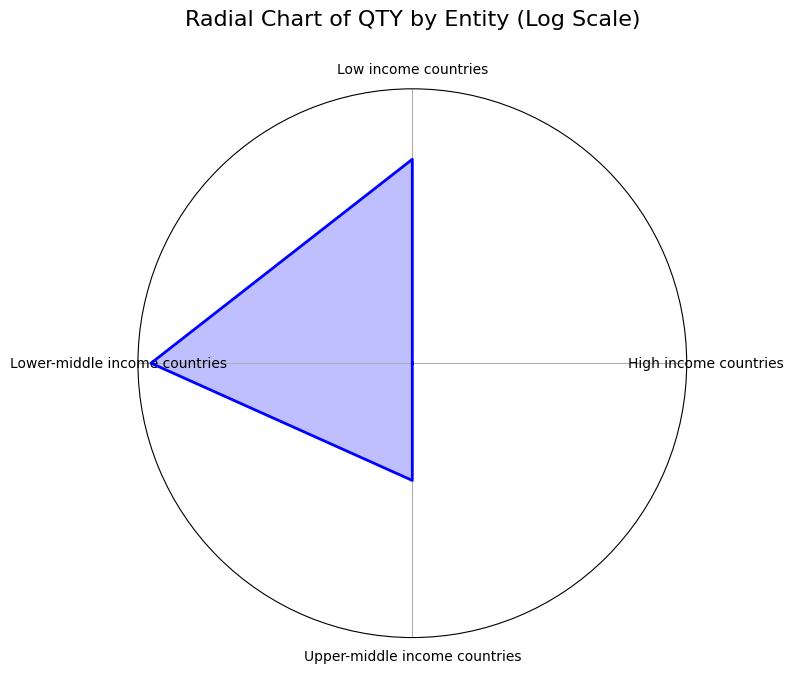

In [21]:
categories = grouped_data['Entity']
values = grouped_data['QTY']

values_log = np.log10(values)
values_normalized = (values_log - min(values_log)) / (max(values_log) - min(values_log))

num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]
values_normalized = np.append(values_normalized, values_normalized[0])

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, values_normalized, color='blue', alpha=0.25)
ax.plot(angles, values_normalized, color='blue', linewidth=2)
ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)
plt.title('Radial Chart of QTY by Entity (Log Scale)', size=16, y=1.1)
plt.tight_layout()
plt.show()